9.380018942869395 -11.027234234984276
w:  [0.35644072 0.35644072]
b:  1.7822035991446015


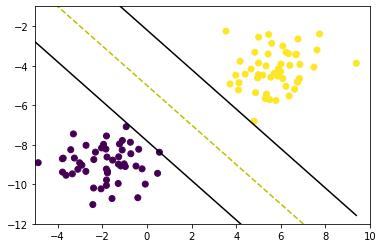

In [30]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.datasets.samples_generator import make_blobs

# step 1: generate data
(X, y) = make_blobs(n_samples=100,
                    n_features=2,
                    centers=2,
                    cluster_std=1.05,
                    random_state=40)
# print(X.shape)
# print(X) #[[  7.12731332  -4.4394424 ] [  6.68873898  -2.44840134]
# print(y) # 1 1 0 1 0 0 1 0 1 0 1 1 0 ...

X1 = np.c_[np.ones((X.shape[0])), X]
# print(X1)

# display data
# plt.scatter(X1[:,1], X1[:,2],marker='o', c=y)
# plt.axis([-5,10,-12,-1])
# plt.show()

# step 2: cluster the data
# for svm, we set the data cluster value to -1 and 1
positive_data = list()
negative_data = list()
for i, v in enumerate(y):
    if v == 0:
        negative_data.append(X[i])
    else:
        positive_data.append(X[i])

data_dict = {1: np.array(positive_data), -1: np.array(negative_data)}
# print(data_dict)

# step 3: svm training

w = []  # weights 2 dimesional vector
b = []  # bias
max_feature_value = float('-inf')
min_feature_value = float('+inf')

for yi in data_dict:
    if np.amax(data_dict[yi]) > max_feature_value:
        max_feature_value = np.amax(data_dict[yi])

    if np.amin(data_dict[yi]) < min_feature_value:
        min_feature_value = np.amin(data_dict[yi])

print(max_feature_value, min_feature_value)
learning_rates = [max_feature_value * 0.1,
                  max_feature_value * 0.01,
                  max_feature_value * 0.001]


def svm_training(data_dict):
    i = 1
    global w
    global b

    length_w_vector = {}
    transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value * 0.5

    for rate in learning_rates:
        w = np.array([w_optimum, w_optimum])
        optimized = False

        while not optimized:
            for b in np.arange(-1 * (max_feature_value * b_step_size), max_feature_value * b_step_size,
                               rate * b_multiple):
                for transformation in transforms:
                    w_t = w * transformation
                    correctly_classified = True

                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi * (np.dot(w_t, xi) + b) < 1:
                                correctly_classified = False

                    if correctly_classified:
                        length_w_vector[np.linalg.norm(w_t)] = [w_t, b]
            if w[0] < 0:
                optimized = True
            else:
                w = w - rate

        norms = sorted([n for n in length_w_vector])

        minimum_w_length = length_w_vector[norms[0]]
        w = minimum_w_length[0]
        b = minimum_w_length[1]

        w_optimum = w[0] + rate * 2

svm_training(data_dict)

print("w: ", w)
print("b: ", b)

# step 4: plot the svm result
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def visualize(data_dict):
    # [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]

    plt.scatter(X1[:, 1], X1[:, 2], marker='o', c=y)

    # hyperplane = x.w+b
    # v = x.w+b
    # psv = 1
    # nsv = -1
    # dec = 0
    def hyperplane_value(x, w, b, v):
        return (-w[0] * x - b + v) / w[1]

    datarange = (min_feature_value * 0.9, max_feature_value * 1.)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w.x+b) = 1
    # positive support vector hyperplane
    psv1 = hyperplane_value(hyp_x_min, w, b, 1)
    psv2 = hyperplane_value(hyp_x_max, w, b, 1)
    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    # (w.x+b) = -1
    # negative support vector hyperplane
    nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
    nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    # (w.x+b) = 0
    # positive support vector hyperplane
    db1 = hyperplane_value(hyp_x_min, w, b, 0)
    db2 = hyperplane_value(hyp_x_max, w, b, 0)
    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    plt.axis([-5, 10, -12, -1])
    plt.show()

visualize(data_dict)

In [10]:
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print('正确率：%.2f%%' % (100 * float(acc.sum()) / a.size))

In [26]:
for i, v in enumerate(y):
    if v==0:
        y[i]=-1
y


print(y)

[ 1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1
  1 -1]


In [27]:
def predict(features):
    # sign( x.w+b )
    dot_result = np.sign(np.dot(np.array(features),w)+b)
    return dot_result.astype(int)

y_hat = predict(X)

In [28]:
print(y_hat)

[ 1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1
  1 -1]


In [29]:
show_accuracy(y, y_hat)

正确率：100.00%


In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

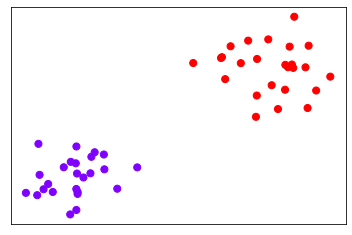

In [18]:
# X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
(X, y) = make_blobs(n_samples=50,
                    n_features=2,
                    centers=2,
                    cluster_std=1.05,
                    random_state=40)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")#rainbow彩虹色
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVC(gamma='auto')

In [7]:
clf.score(X,y)

1.0